In [9]:
from music21 import corpus, converter, scale
import os


In [5]:
import pandas as pd
import os
import glob

# Set working directory
os.chdir("/Users/danielshanahan/gitcloud/corpora/dcml_corpora/schumann_kinderszenen/harmonies")

# Use glob to get all TSV files in the directory
files = glob.glob("*.tsv")

# Read files and add filename column called "song"
data = []
for file in files:
    df = pd.read_csv(file, sep='\t')
    df['song'] = file
    data.append(df)

# Combine all of the files into one (actually many pandas data frames into one)
combined_data = pd.concat(data, ignore_index=True)

combined_data

,mc,mn,quarterbeats,quarterbeats_all_endings,duration_qb,mc_onset,mn_onset,timesig,staff,voice,...,globalkey_is_minor,localkey_is_minor,chord_tones,added_tones,root,bass_note,song,alt_label,special,pedalend
0,1,0,0,0,0.5,0,3/8,2/4,2,1,...,0,0,"1, 5, 2",NaN,1.0,1.0,n08.harmonies.tsv,NaN,NaN,NaN
1,2,1,1/2,1/2,1.5,0,0,2/4,2,1,...,0,0,"0, 4, 1",NaN,0.0,0.0,n08.harmonies.tsv,NaN,NaN,NaN
2,2,1,2,2,0.5,3/8,3/8,2/4,2,1,...,0,0,"0, 4, 1, -2",NaN,0.0,0.0,n08.harmonies.tsv,NaN,NaN,NaN
3,3,2,5/2,5/2,1.0,0,0,2/4,2,1,...,0,0,"-1, 3, 0",NaN,-1.0,-1.0,n08.harmonies.tsv,NaN,NaN,NaN
4,3,2,7/2,7/2,1.0,1/4,1/4,2/4,2,1,...,0,0,"2, -1, 3, 0",NaN,2.0,2.0,n08.harmonies.tsv,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,22,22,65,65,1.0,1/2,1/2,3/4,2,1,...,0,0,"4, 1, 0",NaN,0.0,4.0,n09.harmonies.tsv,NaN,NaN,NaN
944,23,23,66,66,2.0,0,0,3/4,2,1,...,0,0,"-1, 1, 0, 2",NaN,1.0,-1.0,n09.harmonies.tsv,ii65(+4),NaN,NaN
945,23,23,68,68,1.0,1/2,1/2,3/4,2,1,...,0,0,"1, 0, 4",NaN,0.0,1.0,n09.harmonies.tsv,V(64),NaN,NaN
946,24,24,69,69,2.0,0,0,3/4,2,1,...,0,0,"4, 1, 0",NaN,0.0,4.0,n09.harmonies.tsv,NaN,NaN,NaN


In [9]:
df_distinct = combined_data.drop_duplicates(subset=['song', 'globalkey', 'timesig'])
df_distinct


import pandas as pd

# Get distinct combinations
x = combined_data.drop_duplicates(subset=['song', 'globalkey', 'timesig'])

# Create a cross-tabulation
result = pd.crosstab(x['globalkey'], x['timesig'])

# Display the result
print(result)

timesig    2/4  2/8  3/4  4/4
globalkey                    
A            0    0    1    0
C            0    0    1    0
D            2    0    1    0
F            1    0    0    1
G            1    0    0    1
b            1    0    0    0
e            2    0    0    0
g#           0    1    0    0


In [13]:
import pandas as pd

# Filter rows where 'cadence' contains 'C', handling NaN values
cadences = combined_data[combined_data['cadence'].str.contains('C', na=False)]

# Select only 'song' and 'cadence' columns
selected_columns = cadences[['song', 'cadence']]

# Group by 'song' and 'cadence', count occurrences, and reset index
grouped_data = selected_columns.groupby(['song', 'cadence']).size().reset_index(name='n')

# Sort values by count in descending order
df_sorted = grouped_data.sort_values('n', ascending=False)

# getting percentage
df_result = df_sorted.copy()
df_result['total'] = df_result.groupby('song')['n'].transform('sum')
df_result['percentage'] = (df_result['n'] / df_result['total']) * 100


df_result

,song,cadence,n,total,percentage
20,n11.harmonies.tsv,HC,7,9,77.777778
23,n12.harmonies.tsv,HC,6,7,85.714286
10,n06.harmonies.tsv,PAC,5,5,100.000000
18,n10.harmonies.tsv,HC,4,8,50.000000
2,n02.harmonies.tsv,IAC,4,10,40.000000
3,n02.harmonies.tsv,PAC,4,10,40.000000
5,n03.harmonies.tsv,PAC,4,6,66.666667
6,n04.harmonies.tsv,HC,4,6,66.666667
19,n10.harmonies.tsv,PAC,4,8,50.000000
14,n08.harmonies.tsv,IAC,4,8,50.000000


In [45]:
### just grabbing the select column.
combined_data_selected = combined_data[combined_data['mn_onset'] == "0"][['numeral']]

# note that we can use shift here instead of lead.
combined_data_selected['next_numeral'] = combined_data_selected['numeral'].shift(-1)

# Group by 'numeral' and 'next_numeral', count occurrences
df_grouped = combined_data_selected.groupby(['numeral', 'next_numeral']).size().reset_index(name='n')
print(df_grouped)


   numeral next_numeral   n
0     #vii         #vii   3
1     #vii            I   4
2     #vii            V   2
3     #vii            i   2
4        I            I  17
..     ...          ...  ..
58     vii         #vii   1
59     vii            I   1
60     vii            V   2
61     vii           ii   2
62     vii          vii   2

[63 rows x 3 columns]


In [48]:
def harmonic_bigrams(df, beat_strength=0, percentage=False):
    # Filter rows where mn_onset is 0 and select 'numeral' column
    df_filtered = df[df['mn_onset'] == "0"][['numeral']]
    
    # Create the 'next_numeral' column by shifting the 'numeral' column
    df_filtered['next_numeral'] = df_filtered['numeral'].shift(-1)
    
    # Count occurrences of each bigram
    df_count = df_filtered.groupby(['numeral', 'next_numeral']).size().reset_index(name='n')
    
    if percentage:
        # Calculate percentage if percentage is True
        df_count['percentage'] = round(df_count['n'] / df_count.groupby('numeral')['n'].transform('sum') * 100, 2)
    
    return df_count

# Usage
bigram_data = harmonic_bigrams(df=combined_data, percentage=True)
print(bigram_data)

   numeral next_numeral   n  percentage
0     #vii         #vii   3       27.27
1     #vii            I   4       36.36
2     #vii            V   2       18.18
3     #vii            i   2       18.18
4        I            I  17       19.32
..     ...          ...  ..         ...
58     vii         #vii   1       12.50
59     vii            I   1       12.50
60     vii            V   2       25.00
61     vii           ii   2       25.00
62     vii          vii   2       25.00

[63 rows x 4 columns]


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def matrix_plotter(data_for_matrix, pct=False):
    plt.figure(figsize=(10, 8))

    if not pct:
        # Plot for counts
        heatmap = sns.heatmap(data_for_matrix.pivot('numeral', 'next_numeral', 'n'),
                              annot=True, 
                              fmt='d', 
                              cmap='Blues', 
                              linewidths=2,
                              cbar_kws={'label': 'Count'})
    else:
        # Plot for percentages
        heatmap = sns.heatmap(data_for_matrix.pivot('numeral', 'next_numeral', 'percentage'),
                              annot=True, 
                              fmt='.2f', 
                              cmap='Blues', 
                              linewidths=2,
                              cbar_kws={'label': 'Percentage'})

    plt.title('Matrix Plot')
    plt.xlabel('Next Numeral')
    plt.ylabel('Numeral')
    
    # Adjust the aspect ratio to make it square
    plt.gca().set_aspect('equal', 'box')
    
    # Set the theme to be similar to theme_bw() in R
    sns.set_style("whitegrid")
    
    plt.show()

ValueError: Unknown format code 'd' for object of type 'float'

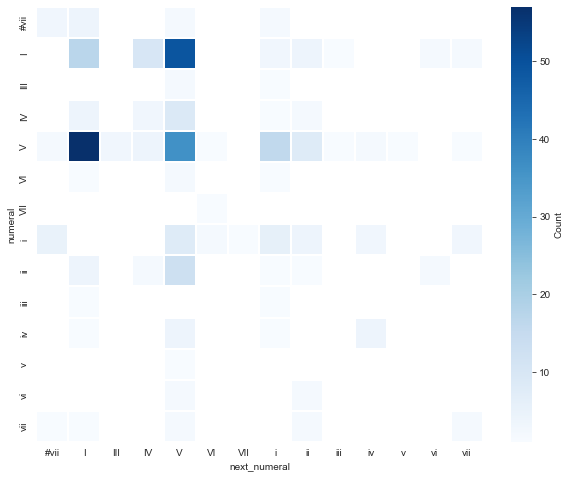

In [63]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def matrix_plotter(data_for_matrix, pct=False):
    plt.figure(figsize=(10, 8))

    if not pct:
        # Plot for counts
        heatmap = sns.heatmap(data_for_matrix.pivot('numeral', 'next_numeral', 'n'),
                              annot=True, 
                              fmt='d', 
                              cmap='Blues', 
                              linewidths=2,
                              cbar_kws={'label': 'Count'})
    else:
        # Plot for percentages
        heatmap = sns.heatmap(data_for_matrix.pivot('numeral', 'next_numeral', 'percentage'),
                              annot=True, 
                              fmt='.2f', 
                              cmap='Blues', 
                              linewidths=2,
                              cbar_kws={'label': 'Percentage'})

    plt.title('Matrix Plot')
    plt.xlabel('Next Numeral')
    plt.ylabel('Numeral')
    
    # Adjust the aspect ratio to make it square
    plt.gca().set_aspect('equal', 'box')
    
    # Set the theme to be similar to theme_bw() in R
    sns.set_style("whitegrid")
    
    plt.show()

matrix_plotter(bigram_data, pct=False)

In [61]:
bigram_data


,numeral,next_numeral,n,percentage
0,#vii,#vii,3,27.27
1,#vii,I,4,36.36
2,#vii,V,2,18.18
3,#vii,i,2,18.18
4,I,I,17,19.32
...,...,...,...,...
58,vii,#vii,1,12.50
59,vii,I,1,12.50
60,vii,V,2,25.00
61,vii,ii,2,25.00


In [1]:
def process_kern_file(file_path):
    # Parse the kern file
    score = converter.parse(file_path)
    
    # Analyze the key
    key = score.analyze('key')
    
    # Create a scale based on the analyzed key
    sc = scale.MajorScale(key.tonic) if key.mode == 'major' else scale.MinorScale(key.tonic)
    
    # Get all notes from the score
    notes = score.flatten().notesAndRests.notes
    
    # Convert pitches to scale degrees
    scale_degrees = [sc.getScaleDegreeFromPitch(note.pitch) for note in notes]
    
    return scale_degrees

In [2]:
def process_corpus(directory):
    all_scale_degrees = []
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.krn'):
                file_path = os.path.join(root, file)
                scale_degrees = process_kern_file(file_path)
                all_scale_degrees.extend(scale_degrees)
    
    return all_scale_degrees

In [3]:
def calculate_scale_degree_percentages(scale_degrees):
    total = len(scale_degrees)
    counts = {}
    
    for degree in scale_degrees:
        counts[degree] = counts.get(degree, 0) + 1
    
    percentages = {degree: (count / total) * 100 for degree, count in counts.items()}
    
    return percentages

In [4]:
# Specify the directory containing your kern files
kern_directory = '../data/charlie_parker/'

# Process the corpus
all_scale_degrees = process_corpus(kern_directory)

# Calculate percentages
percentages = calculate_scale_degree_percentages(all_scale_degrees)

# Print results
for degree, percentage in sorted(percentages.items()):
    print(f"Scale degree {degree}: {percentage:.2f}%")

NameError: name 'os' is not defined

In [5]:
# Get unique pitches
from music21 import converter
from collections import Counter

# Parse the kern file and extract all the pitches
score = converter.parse('../data/charlie_parker/*.krn')
all_pitches = score.pitches

# Count occurrences of each pitch
pitch_counter = Counter(str(p) for p in all_pitches)

# Print results and sort!
print("Pitch counts:")
for pitch_name, count in pitch_counter.most_common():
    print(f"{pitch_name}: {count}")

ConverterException: File not found or no such format found for: ../data/charlie_parker/*.krn

In [6]:
from music21 import analysis, note, converter, humdrum
import glob

def filebrowser(ext="../data/charlie_parker_no_chords/*.krn"):
    "Returns files with an extension"
    return [f for f in glob.glob(ext)]

file_list = filebrowser()
file_list


['../data/charlie_parker_no_chords/Cosmic_Rays.krn',
 '../data/charlie_parker_no_chords/Au_Private_(No.2).krn',
 '../data/charlie_parker_no_chords/Thriving_From_A_Riff.krn',
 '../data/charlie_parker_no_chords/Bloomdido.krn',
 '../data/charlie_parker_no_chords/Celerity.krn',
 '../data/charlie_parker_no_chords/Warming_Up_A_Riff.krn',
 '../data/charlie_parker_no_chords/Another_Hairdo.krn',
 '../data/charlie_parker_no_chords/Segment.krn',
 '../data/charlie_parker_no_chords/Ko_Ko.krn',
 '../data/charlie_parker_no_chords/Diverse.krn',
 '../data/charlie_parker_no_chords/Leap_Frog.krn',
 '../data/charlie_parker_no_chords/Mohawk_(No.1).krn',
 '../data/charlie_parker_no_chords/K.C.Blues.krn',
 '../data/charlie_parker_no_chords/Relaxing_With_Lee.krn',
 '../data/charlie_parker_no_chords/Confirmation.krn',
 '../data/charlie_parker_no_chords/Card_Board.krn',
 '../data/charlie_parker_no_chords/Passport.krn',
 '../data/charlie_parker_no_chords/My_Melody.krn',
 '../data/charlie_parker_no_chords/Klaun_S

In [18]:
from music21 import *
import pandas as pd
from collections import Counter

def analyze_scale_degrees(file_list):
    all_scale_degrees = []
    
    for file in file_list:
        score = converter.parse(file)
        key = score.analyze('key')
        sc = scale.MajorScale(key.tonic)
        
        for pitch in score.pitches:
            scale_degree = sc.getScaleDegreeFromPitch(pitch)
            all_scale_degrees.append(scale_degree)
    
    scale_degree_counter = Counter(all_scale_degrees)
    total_count = sum(scale_degree_counter.values())
    
    data = []
    for degree, count in scale_degree_counter.most_common():
        percentage = (count / total_count) * 100
        data.append({
            'Scale Degree': degree,
            'Count': count,
            'Percentage': f"{percentage:.2f}%"
        })
    
    df = pd.DataFrame(data)
    return df

# Assuming file_list is defined
result_table = analyze_scale_degrees(file_list)
print(result_table.to_string(index=False))

 Scale Degree  Count Percentage
          NaN   6041     23.75%
          1.0   3788     14.89%
          5.0   3313     13.03%
          2.0   3013     11.85%
          3.0   2720     10.69%
          4.0   2713     10.67%
          6.0   2134      8.39%
          7.0   1713      6.73%


In [25]:
from music21 import converter, interval
from collections import Counter
import pandas as pd

def analyze_interval_bigrams(file_list):
    all_bigrams = []
    
    for file in file_list:
        score = converter.parse(file)
        
        ###list comprehension, etc.
        pitches = [p for p in score.pitches if p is not None]
        
        # create an interval list
        intervals = []

        ### some conditionals to label the directions.
        ### 1 = ascending, 0 = oblique (no motion), -1 = descending. 
        ### here I've just > 0, less than 0 and else (ascending, decending, and oblique).

        for i in range(len(pitches) - 1):
            int_obj = interval.Interval(pitches[i], pitches[i+1])
            semitones = int_obj.semitones
            
            if semitones > 0:
                direction = "Ascending"
            elif semitones < 0:
                direction = "Descending"
            else:
                direction = "Oblique"

            interval_name = f"{direction} {int_obj.semiSimpleName}"
            intervals.append(interval_name)
        
        # Create bigrams of intervals
        bigrams = list(zip(intervals[:-1], intervals[1:]))
        all_bigrams.extend(bigrams)
    
    bigram_counter = Counter(all_bigrams)
    total_count = sum(bigram_counter.values())
    
    data = []
    for bigram, count in bigram_counter.most_common():
        percentage = (count / total_count) * 100
        data.append({
            'Interval Bigram': f"{bigram[0]} -> {bigram[1]}",
            'Count': count,
            'Percentage': f"{percentage:.2f}%"
        })
    
    df = pd.DataFrame(data)
    return df

# Usage
bigram_df = analyze_interval_bigrams(file_list)
print(bigram_df)

                    Interval Bigram  Count Percentage
0    Descending M2 -> Descending m2   1368      5.40%
1    Descending m2 -> Descending M2    997      3.94%
2    Descending M2 -> Descending M2    856      3.38%
3     Ascending M2 -> Descending M2    620      2.45%
4      Ascending m2 -> Ascending M2    575      2.27%
..                              ...    ...        ...
822    Ascending M6 -> Ascending P4      1      0.00%
823   Ascending m2 -> Descending A4      1      0.00%
824      Ascending d8 -> Oblique P1      1      0.00%
825   Ascending A4 -> Descending M7      1      0.00%
826   Ascending M6 -> Descending m6      1      0.00%

[827 rows x 3 columns]


In [72]:
### import the toolkits
import glob
from music21 import *

### adjust your own path accordingly!!!
def filebrowser(ext="../data/humdrum_scores/Barbershop/*.krn"):
    return glob.glob(ext)

file_list = filebrowser()

### here's a loop to get the melodic intervals from only the bass part.
for file in file_list:
    score = converter.parse(file)
    #### THIS IS THE CODE I WAS STRUGGLING WITH IN CLASS!
    first_part = score.parts[0]
    notes = first_part.recurse().notesAndRests
    for i in range(len(notes) - 1):
        if notes[i].isNote and notes[i+1].isNote:
            int_obj = interval.Interval(notes[i], notes[i+1])
            print(f"{int_obj.directedName}")

    

P1
P1
m2
M2
m-3
P1
P1
m3
P1
P1
P1
m-3
P1
P1
m3
P1
m-2
P1
P1
P1
d1
A4
m-2
m2
M-2
M-2
P4
m-3
P1
A1
m2
P1
A-4
P1
m-2
P1
P1
m2
M2
m-3
P4
P1
M-2
P1
P1
m-2
m2
P1
P1
P1
P4
d-5
d5
d-5
P1
P1
P1
P1
P1
P1
P1
P1
d1
P1
m-2
P1
P1
m2
M2
m-3
P1
P1
m3
P1
P1
P1
m-3
P1
P1
m3
P1
m-2
P1
P1
P1
d1
A4
m-2
m2
M-2
M-2
M2
M2
m2
P-4
P1
P4
P1
P1
m-2
P1
d1
P1
P1
P1
P1
P-4
P1
M2
P1
m-3
M2
P1
m3
P1
P1
M-2
P1
P1
P1
m-3
m2
m-2
P1
P4
m-3
d1
m-2
P1
M3
P1
P1
M-3
M3
P1
P1
P1
m3
m-2
d1
P1
m-3
m3
P1
P1
m-3
m3
P1
P1
P1
P1
P1
m-2
P-4
m2
m-3
P4
M3
m-2
P1
P1
d1
P1
P1
P1
m-2
m-2
P1
P1
d1
P1
P1
P1
M3
P1
P1
P1
M-3
P1
P1
A4
P1
P1
P1
d1
P1
P1
P1
m-2
P1
d1
m-2
m-2
M-2
P1
P1
P1
m-2
m2
d5
m-2
P1
M-2
m-2
A1
m2
m-2
P1
P1
P1
P1
d1
P1
d1
m-2
m-2
M-2
P1
P1
P1
m-2
m2
m2
M2
M2
m2
m-2
M-2
P1
m2
M-6
M2
M2
M-3
M6
d1
m-2
M2
m3
P1
P1
P1
P1
m-2
d5
P1
m-2
M-2
m3
m-2
P1
P1
P1
P1
M-2
M-2
M2
m3
m-3
M-3
m-3
A1
m2
m3
P1
M-2
P1
P1
A4
P1
P1
P1
m-2
P1
M-3
P1
P1
P1
m-2
d5
P1
m-2
M-2
m3
m-2
P1
M-2
m-2
m2
A1
m2
P1
P1
M2
m-2
m2
m-2
d1
P1
P1
P1
P1
m-2
m2
A1
m2
P1

In [16]:
def beat_and_strength(filename):
    beat_strength = []
    scale_degree = []

    try:
        # Parse only the first spine of the kern file
        with open(filename, 'r') as file:
            kern_content = file.read()
        spine_parser = humdrum.spineParser(kern_content)
        first_spine = spine_parser.getSpineData(0)  # Get the first spine (index 0)

        # Convert the first spine to a music21 stream
        melody = converter.parse('\n'.join(first_spine), format='humdrum')

        # Analyze the key based on the first spine
        pitch_count = analysis.discrete.KrumhanslKessler(melody)
        key = pitch_count.getSolution(melody)

        for n in melody.flat.notesAndRests:
            if isinstance(n, note.Note):
                sd = key.getScaleDegreeFromPitch(n.pitch)
                scale_degree.append(float(sd) if sd is not None else 0)
                beat_strength.append(float(n.beatStrength))
            elif isinstance(n, note.Rest):
                scale_degree.append(0)
                beat_strength.append(float(n.beatStrength))

    except Exception as e:
        print(f"Error processing {filename}: {str(e)}")
        return [[], []]

    return [beat_strength, scale_degree]

In [17]:
for file in file_list:
    beat_and_strength(file)

Error processing ../data/charlie_parker_no_chords/Cosmic_Rays.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Au_Private_(No.2).krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Thriving_From_A_Riff.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Bloomdido.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Celerity.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Warming_Up_A_Riff.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Another_Hairdo.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Segment.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Ko_Ko.krn: name 'humdrum' is not defined
Error processing ../data/charlie_parker_no_chords/Diverse.krn: name 'humdrum' is not defined
Error processing ../data/

In [12]:
from music21 import converter, scale
from collections import Counter
import pandas as pd

def analyze_scale_degree_bigrams(file_list):
    all_bigrams = []
    
    for file in file_list:
        score = converter.parse(file)
        key = score.analyze('key')
        sd = scale.MajorScale(key.tonic)
        
        scale_degrees = []
        for pitch in score.pitches:
            scale_degree = sd.getScaleDegreeFromPitch(pitch)
            if scale_degree is not None:  # Only append non-None scale degrees
                scale_degrees.append(scale_degree)
        
        # Create bigrams
        bigrams = list(zip(scale_degrees[:-1], scale_degrees[1:]))
        all_bigrams.extend(bigrams)
    
    bigram_counter = Counter(all_bigrams)
    total_count = sum(bigram_counter.values())
    
    data = []
    for bigram, count in bigram_counter.most_common():
        if None not in bigram:  # Exclude bigrams containing None
            percentage = (count / total_count) * 100
            data.append({
                'Scale Degree Bigram': f"{bigram[0]}-{bigram[1]}",
                'Count': count,
                'Percentage': f"{percentage:.2f}%"
            })
    
    df = pd.DataFrame(data)
    return df

In [13]:
bigram_df = analyze_scale_degree_bigrams(file_list)
print(bigram_df)

   Scale Degree Bigram  Count Percentage
0                  2-1   1180      6.10%
1                  5-4   1055      5.46%
2                  4-3    798      4.13%
3                  1-2    750      3.88%
4                  3-2    701      3.63%
5                  1-6    637      3.29%
6                  3-5    637      3.29%
7                  1-7    634      3.28%
8                  4-5    626      3.24%
9                  6-5    622      3.22%
10                 7-1    544      2.81%
11                 3-4    537      2.78%
12                 2-3    537      2.78%
13                 1-5    535      2.77%
14                 1-3    516      2.67%
15                 6-1    511      2.64%
16                 5-6    472      2.44%
17                 5-5    456      2.36%
18                 1-1    448      2.32%
19                 7-2    447      2.31%
20                 5-3    427      2.21%
21                 4-2    427      2.21%
22                 3-1    399      2.06%
23              

In [3]:
from music21 import converter, scale
from collections import Counter
import pandas as pd

def analyze_scale_degrees(file_list):
    all_scale_degrees = []
    
    for file in file_list:
        score = converter.parse(file)
        key = score.analyze('key')
        sd = scale.MajorScale(key.tonic)
        
        for pitch in score.pitches:
            scale_degree = sd.getScaleDegreeFromPitch(pitch)
            if scale_degree is not None:  # Only append non-None scale degrees
                all_scale_degrees.append(scale_degree)
    
    scale_degree_counter = Counter(all_scale_degrees)
    total_count = sum(scale_degree_counter.values())
    
    data = []
    for degree, count in scale_degree_counter.most_common():
        percentage = (count / total_count) * 100
        data.append({
            'Scale Degree': degree,
            'Count': count,
            'Percentage': f"{percentage:.2f}%"
        })
    
    df = pd.DataFrame(data)
    return df

In [99]:
bigram_df = analyze_scale_degree_bigrams(file_list)
print(bigram_df)

   Scale Degree Bigram  Count Percentage
0            None-None   1819      7.17%
1               None-5    962      3.79%
2                  2-1    947      3.73%
3                  5-4    881      3.47%
4               1-None    844      3.33%
..                 ...    ...        ...
59                 3-7     78      0.31%
60                 3-6     66      0.26%
61                 4-7     33      0.13%
62                 7-3     21      0.08%
63                 7-4      5      0.02%

[64 rows x 3 columns]


In [102]:
from music21 import converter, scale
from collections import Counter
import pandas as pd

def analyze_scale_degree_trigrams(file_list):
    all_trigrams = []
    
    for file in file_list:
        score = converter.parse(file)
        key = score.analyze('key')
        sd = scale.MajorScale(key.tonic)
        
        scale_degrees = []
        for pitch in score.pitches:
            scale_degree = sd.getScaleDegreeFromPitch(pitch)
            if scale_degree is not None:
                scale_degrees.append(scale_degree)
        #### this is the zip part. 
        trigrams = list(zip(scale_degrees[:-2], scale_degrees[1:-1], scale_degrees[2:]))
        all_trigrams.extend(trigrams)
    
    trigram_counter = Counter(all_trigrams)
    total_count = sum(trigram_counter.values())
    ## create the list.
    data = []
    for trigram, count in trigram_counter.most_common():
        if None not in trigram:  
            percentage = (count / total_count) * 100
            data.append({
                'Scale Degree Trigram': f"{trigram[0]}-{trigram[1]}-{trigram[2]}",
                'Count': count,
                'Percentage': f"{percentage:.2f}%"
            })
    
    df = pd.DataFrame(data)
    return df

##print nice trigrams!
trigram_df = analyze_scale_degree_trigrams(file_list)
print(trigram_df)

    Scale Degree Trigram  Count Percentage
0                  5-4-3    509      2.64%
1                  2-1-7    461      2.39%
2                  4-3-2    359      1.86%
3                  3-2-1    350      1.82%
4                  6-5-4    331      1.72%
..                   ...    ...        ...
337                7-3-1      1      0.01%
338                7-7-4      1      0.01%
339                7-4-1      1      0.01%
340                4-7-3      1      0.01%
341                5-7-4      1      0.01%

[342 rows x 3 columns]


In [5]:
from music21 import converter, scale, meter, analysis, note, converter, humdrum
from collections import Counter
import pandas as pd
import glob


In [7]:
import glob
def filebrowser(ext="../data/charlie_parker_no_chords/*.krn"):
    "Returns files with an extension"
    return [f for f in glob.glob(ext)]

file_list = filebrowser()
file_list



['../data/charlie_parker_no_chords/Cosmic_Rays.krn',
 '../data/charlie_parker_no_chords/Au_Private_(No.2).krn',
 '../data/charlie_parker_no_chords/Thriving_From_A_Riff.krn',
 '../data/charlie_parker_no_chords/Bloomdido.krn',
 '../data/charlie_parker_no_chords/Celerity.krn',
 '../data/charlie_parker_no_chords/Warming_Up_A_Riff.krn',
 '../data/charlie_parker_no_chords/Another_Hairdo.krn',
 '../data/charlie_parker_no_chords/Segment.krn',
 '../data/charlie_parker_no_chords/Ko_Ko.krn',
 '../data/charlie_parker_no_chords/Diverse.krn',
 '../data/charlie_parker_no_chords/Leap_Frog.krn',
 '../data/charlie_parker_no_chords/Mohawk_(No.1).krn',
 '../data/charlie_parker_no_chords/K.C.Blues.krn',
 '../data/charlie_parker_no_chords/Relaxing_With_Lee.krn',
 '../data/charlie_parker_no_chords/Confirmation.krn',
 '../data/charlie_parker_no_chords/Card_Board.krn',
 '../data/charlie_parker_no_chords/Passport.krn',
 '../data/charlie_parker_no_chords/My_Melody.krn',
 '../data/charlie_parker_no_chords/Klaun_S

In [7]:

def analyze_scale_degree_bigrams(file_list):
    all_bigrams = []
    
    for file in file_list:
        score = converter.parse(file)
        key = score.analyze('key')
        sd = scale.MajorScale(key.tonic)
        
        scale_degrees = []
        for part in score.parts:
            measures = part.getElementsByClass('Measure')
            for measure in measures:
                time_signature = measure.getTimeSignatures()[0] if measure.getTimeSignatures() else meter.TimeSignature('4/4')
                beat_duration = time_signature.beatDuration
                
                for note in measure.notesAndRests:
                    if note.offset % beat_duration.quarterLength == 0:  # Check if note is on a downbeat
                        if isinstance(note, music21.note.Note):
                            scale_degree = sd.getScaleDegreeFromPitch(note.pitch)
                            if scale_degree is not None:
                                scale_degrees.append(scale_degree)
        
        # Create bigrams
        bigrams = list(zip(scale_degrees[:-1], scale_degrees[1:]))
        all_bigrams.extend(bigrams)
    
    bigram_counter = Counter(all_bigrams)
    total_count = sum(bigram_counter.values())
    
    data = []
    for bigram, count in bigram_counter.most_common():
        if None not in bigram:  # Exclude bigrams containing None
            percentage = (count / total_count) * 100
            data.append({
                '2-gram': f"{bigram[0]}-{bigram[1]}",
                'Count': count,
                'Percentage': f"{percentage:.2f}%"
            })
    
    df = pd.DataFrame(data)
    return df

# Usage
bigram_df = analyze_scale_degree_bigrams(file_list)
print(bigram_df)

NameError: name 'music21' is not defined

In [27]:
from music21 import converter, scale, note, meter
from collections import Counter
import pandas as pd

def analyze_strong_beat_bigrams(file_list):
    all_bigrams = []
    
    for file in file_list:
        score = converter.parse(file)
        key = score.analyze('key')
        sd = scale.MajorScale(key.tonic)
        
        # Get all time signatures in the score, sorted by offset
        time_signatures = sorted(score.flat.getTimeSignatures(), key=lambda ts: ts.offset)
        if not time_signatures:
            time_signatures = [meter.TimeSignature('4/4')]  # Default to 4/4 if no time signature found
        
        scale_degrees = []
        current_ts_index = 0
        current_ts = time_signatures[0]
        current_measure_offset = 0.0
        
        for n in score.flat.notesAndRests:
            # Update current time signature if necessary
            while (current_ts_index < len(time_signatures) - 1 and 
                   n.offset >= time_signatures[current_ts_index + 1].offset):
                current_ts_index += 1
                current_ts = time_signatures[current_ts_index]
                current_measure_offset = current_ts.offset
            
            # Calculate the position within the current measure
            position_in_measure = (n.offset - current_measure_offset) % current_ts.barDuration.quarterLength
            
            # Check if it's a strong beat (first beat of the measure or halfway through in common time signatures)
            if position_in_measure == 0.0 or (current_ts.ratioString in ('4/4', '2/2', '2/4') and position_in_measure == current_ts.barDuration.quarterLength / 2):
                if isinstance(n, note.Note):
                    scale_degree = sd.getScaleDegreeFromPitch(n.pitch)
                    if scale_degree is not None:
                        scale_degrees.append(scale_degree)
                    
        

        
        # Create bigrams
        bigrams = list(zip(scale_degrees[:-1], scale_degrees[1:]))
        all_bigrams.extend(bigrams)
    
    bigram_counter = Counter(all_bigrams)
    total_count = sum(bigram_counter.values())
    
    data = []
    for bigram, count in bigram_counter.most_common():
        percentage = (count / total_count) * 100
        data.append({
            '2-gram': f"{bigram[0]}-{bigram[1]}",
            'Count': count,
            'Percentage': f"{percentage:.2f}%"
        })
    



# Usage
bigram_df = analyze_strong_beat_bigrams(file_list)
print(bigram_df)

None


In [28]:
# Usage
bigram_df = analyze_strong_beat_bigrams(file_list)
print(bigram_df)

None


In [30]:
### your code below
def beat_and_strength(filename):
    
    beat_strength = []
    scale_degree = []

    # open the file so we can read through it

    kern_file = [line.rstrip() for line in open(filename, "r+")]

    # skip file if it has an MX in it, use it if it does not
    # this gets rid of irregular time signatures

    if "MX" not in kern_file:
        melody = converter.parse(filename)
        ### getting all pitches as scale degree.
        pitch_count = analysis.discrete.KrumhanslKessler(melody)
        key = pitch_count.getSolution(melody)
        my_list = []

        for n in melody.flat.notes:
            sd = key.getScaleDegreeFromPitch(n.name)
            if sd is not None:
                scale_degree.append(float(sd))
            else:
                scale_degree.append(0)
            beat_strength.append(float(n.beatStrength))
    else:
        print(filename, "has irregular time signatures. Skipping.")

    # return two arrays
    return [beat_strength, scale_degree]
b_and_s = [ beat_and_strength(filename) for filename in filebrowser()]


Music21ObjectException: this object does not have a TimeSignature in Sites

In [31]:
from music21 import *
import pandas as pd

def analyze_strong_beat_bigrams(file_list):
    bigram_counts = {}
    
    for file in file_list:
        score = converter.parse(file)
        
        for part in score.parts:
            measures = part.getElementsByClass('Measure')
            
            for i in range(len(measures) - 1):
                m1 = measures[i]
                m2 = measures[i+1]
                
                # Get the time signature for the current measure
                ts = m1.timeSignature
                if ts is None:
                    # If no time signature in the measure, search recursively
                    ts = m1.getContextByClass('TimeSignature')
                
                if ts is None:
                    # If still no time signature found, skip this measure
                    continue
                
                # Get notes on strong beats
                strong_beat_notes1 = [n for n in m1.notesAndRests if n.beat == 1]
                strong_beat_notes2 = [n for n in m2.notesAndRests if n.beat == 1]
                
                if strong_beat_notes1 and strong_beat_notes2:
                    bigram = (strong_beat_notes1[0].nameWithOctave, strong_beat_notes2[0].nameWithOctave)
                    bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1
    
    # Convert to DataFrame
    df = pd.DataFrame(list(bigram_counts.items()), columns=['Bigram', 'Count'])
    df['First Note'] = df['Bigram'].apply(lambda x: x[0])
    df['Second Note'] = df['Bigram'].apply(lambda x: x[1])
    df = df.drop('Bigram', axis=1)
    
    return df

# Usage
bigram_df = analyze_strong_beat_bigrams(file_list)
print(bigram_df)

AttributeError: 'Rest' object has no attribute 'nameWithOctave'

In [38]:
from music21 import *
import pandas as pd

def analyze_strong_beat_bigrams(file_list):
    bigram_counts = {}
    
    for file in file_list:
        score = converter.parse(file)
        
        for part in score.parts:
            measures = part.getElementsByClass('Measure')
            
            for i in range(len(measures) - 1):
                m1 = measures[i]
                m2 = measures[i+1]
                
                ts = m1.timeSignature
                if ts is None:
                    ts = m1.getContextByClass('TimeSignature')
                
                if ts is None:
                    continue
                
                strong_beat_elements1 = [n for n in m1.notesAndRests if n.beat == 1]
                strong_beat_elements2 = [n for n in m2.notesAndRests if n.beat == 1]
                
                if strong_beat_elements1 and strong_beat_elements2:
                    def get_element_name(elem):
                        if isinstance(elem, note.Note):
                            return elem.nameWithOctave
                        elif isinstance(elem, note.Rest):
                            return 'Rest'
                        else:
                            return 'Unknown'
                    
                    bigram = (get_element_name(strong_beat_elements1[0]), 
                              get_element_name(strong_beat_elements2[0]))
                    bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1
    
    # total bigrams
    total_count = sum(bigram_counts.values())
    
    # percentages
    percentages = {bigram: (count / total_count) * 100 for bigram, count in bigram_counts.items()}
    
    # make it into a pandas thing.
    df = pd.DataFrame(list(bigram_counts.items()), columns=['Bigram', 'Count'])
    return(df)
  


In [39]:
analyze_strong_beat_bigrams(file_list)

,Bigram,Count
0,"(Rest, F4)",81
1,"(F4, E4)",7
2,"(E4, Rest)",27
3,"(Rest, Rest)",1121
4,"(Rest, A-4)",34
...,...,...
558,"(F#4, G3)",1
559,"(G3, F4)",1
560,"(B-3, F#4)",1
561,"(B-3, E5)",1


In [41]:
### your code below
def beat_and_strength_as_column(filename):
    
    beat_strength = []
    scale_degree = []

    # open the file so we can read through it

    kern_file = [line.rstrip() for line in open(filename, "r+")]

    # skip file if it has an MX in it, use it if it does not
    # this gets rid of irregular time signatures

    if "MX" not in kern_file:
        melody = converter.parse(filename)
        ### getting all pitches as scale degree.
        
        pitch_count = analysis.discrete.KrumhanslKessler(melody)
        key = pitch_count.getSolution(melody)
        my_list = []

        for n in melody.flat.notes:
            sd = key.getScaleDegreeFromPitch(n.name)
            if sd is not None:
                scale_degree.append(float(sd))
            else:
                scale_degree.append(0)
            beat_strength.append(float(n.beatStrength))
    else:
        print(filename, "has irregular time signatures. Skipping.")

    # print an output, but this note that this just a print to the console.
    for beat, scale in zip(beat_strength, scale_degree):
      # return(beat, scale)
      print(f'{beat}\t{scale}')


for file in file_list:
  beat_and_strength_as_column(file)


0.25	7.0
0.0625	1.0
0.0625	7.0
0.125	6.0
0.5	5.0
0.125	4.0
0.25	3.0
0.0625	1.0
0.0625	0
0.0625	1.0
0.0625	4.0
1.0	4.0
0.25	4.0
0.125	0
0.0625	1.0
1.0	3.0
0.25	3.0
0.125	4.0
0.0625	3.0
0.5	1.0
0.0625	2.0
0.0625	0
0.25	0
0.125	3.0
0.25	3.0
0.0625	4.0
0.0625	3.0
0.125	2.0
0.5	1.0
0.125	0
0.25	6.0
0.0625	0
0.0625	6.0
0.125	4.0
1.0	0
0.0625	4.0
0.0625	5.0
0.25	5.0
0.25	5.0
0.0625	4.0
0.0625	1.0
1.0	3.0
0.125	2.0
0.5	2.0
0.125	2.0
0.25	2.0
0.125	1.0
1.0	1.0
0.125	6.0
0.125	5.0
0.5	4.0
0.125	6.0
0.25	1.0
0.125	3.0
1.0	2.0
0.125	1.0
0.25	7.0
0.0625	2.0
0.0625	4.0
0.5	0
0.25	5.0
0.125	4.0
1.0	3.0
0.25	3.0
0.125	1.0
0.0625	6.0
0.5	1.0
0.125	5.0
0.25	5.0
0.0625	1.0
0.125	0
0.0625	5.0
0.25	1.0
0.0625	0
0.125	6.0
0.0625	5.0
0.5	4.0
0.0625	3.0
0.125	2.0
0.0625	0
0.25	1.0
0.0625	6.0
0.125	0
0.0625	1.0
0.0625	0
1.0	6.0
0.0625	1.0
0.125	2.0
0.0625	1.0
0.25	5.0
0.0625	4.0
0.125	1.0
0.0625	6.0
0.5	0
0.125	7.0
0.0625	1.0
0.25	2.0
0.0625	1.0
0.125	7.0
0.0625	1.0
0.5	0
0.0625	3.0
0.125	4.0
0.0625	0
0.25	5.0

Music21ObjectException: this object does not have a TimeSignature in Sites

In [64]:
import glob
from music21 import *
from collections import Counter


def filebrowser(ext="../data/humdrum_scores/Barbershop/*.krn"):
    "Returns files with an extension"
    return [f for f in glob.glob(ext)]

file_list = filebrowser()
file_list

def hint(filename):
    barbershop = converter.parse(filename)
    barbershopChords = barbershop.chordify()
    chord_list = []
    
    for thisChord in barbershopChords.recurse().getElementsByClass(chord.Chord):
        chord_info = (thisChord.measureNumber, thisChord.beatStr, thisChord.commonName)
        chord_list.append(chord_info)
        print(f"Measure: {thisChord.measureNumber}, Beat: {thisChord.beatStr}, Chord: {thisChord.pitchedCommonName}")
    
    return chord_list

for file in file_list:
    hint(file)


Working on ../data/humdrum_scores/Barbershop/barber24.krn
Measure: 1, Beat: 1, Chord: G-major triad
Measure: 1, Beat: 1 1/2, Chord: E-minor triad
Measure: 1, Beat: 2, Chord: G-Perfect Octave
Measure: 1, Beat: 2 1/2, Chord: D-dominant seventh chord
Measure: 2, Beat: 1, Chord: G-major triad
Measure: 2, Beat: 1 1/4, Chord: G-major triad
Measure: 2, Beat: 1 3/4, Chord: G-major triad
Measure: 2, Beat: 2, Chord: G-major triad
Measure: 2, Beat: 2 1/2, Chord: G-major triad
Measure: 3, Beat: 1, Chord: G#-half-diminished seventh chord
Measure: 3, Beat: 2, Chord: E-dominant seventh chord
Measure: 4, Beat: 1, Chord: E-minor seventh chord
Measure: 4, Beat: 1 1/2, Chord: E-major triad
Measure: 4, Beat: 1 7/8, Chord: E-major seventh chord
Measure: 4, Beat: 2, Chord: E-major triad
Measure: 4, Beat: 2 3/8, Chord: E-incomplete dominant-seventh chord
Measure: 4, Beat: 2 1/2, Chord: E-dominant seventh chord
Measure: 5, Beat: 1, Chord: A-dominant seventh chord
Measure: 5, Beat: 2, Chord: A-dominant seventh

humdrum.spineParser: WARNING: Error in parsing event ('*M?') at position 211 for spine None: Incorrect meter: *M? found
humdrum.spineParser: WARNING: Error in parsing event ('*M?') at position 211 for spine None: Incorrect meter: *M? found
humdrum.spineParser: WARNING: Error in parsing event ('*M?') at position 211 for spine None: Incorrect meter: *M? found
humdrum.spineParser: WARNING: Error in parsing event ('*M?') at position 211 for spine None: Incorrect meter: *M? found


Measure: 0, Beat: 2 2/3, Chord: E-minor triad
Measure: 0, Beat: 2 5/6, Chord: B-dominant seventh chord
Measure: 1, Beat: 1, Chord: E-minor triad
Measure: 1, Beat: 1 2/3, Chord: E-minor triad
Measure: 1, Beat: 2, Chord: E-minor triad
Measure: 1, Beat: 2 2/3, Chord: E-minor triad
Measure: 2, Beat: 1, Chord: B-dominant seventh chord
Measure: 2, Beat: 1 2/3, Chord: B-dominant seventh chord
Measure: 2, Beat: 2, Chord: B-dominant seventh chord
Measure: 2, Beat: 2 2/3, Chord: B-dominant seventh chord
Measure: 3, Beat: 1, Chord: E-minor triad
Measure: 3, Beat: 1 2/3, Chord: E-minor triad
Measure: 3, Beat: 2, Chord: B-dominant seventh chord
Measure: 3, Beat: 2 2/3, Chord: B-dominant seventh chord
Measure: 4, Beat: 1, Chord: E-minor triad
Measure: 4, Beat: 2, Chord: E-minor triad
Measure: 4, Beat: 2 2/3, Chord: E-minor triad
Measure: 4, Beat: 2 5/6, Chord: B-dominant seventh chord
Measure: 5, Beat: 1, Chord: E-minor triad
Measure: 5, Beat: 1 2/3, Chord: E-minor triad
Measure: 5, Beat: 2, Chord: 

In [62]:
import glob
import os
from music21 import *
from collections import Counter

def verify_file_access(filename):
    return os.path.exists(filename)

def hint(filename):
    if not verify_file_access(filename):
        print(f"Error: File not found - {filename}")
        return []

    print(f"Working on {filename}")
    try:
        barbershop = converter.parse(filename)
    except Exception as e:
        print(f"Error parsing file: {e}")
        return []

    barbershopChords = barbershop.chordify()
    chord_list = []
    
    for thisChord in barbershopChords.recurse().getElementsByClass(chord.Chord):
        chord_info = (thisChord.measureNumber, thisChord.beatStr, thisChord.commonName)
        chord_list.append(chord_info)
        print(f"Measure: {thisChord.measureNumber}, Beat: {thisChord.beatStr}, Chord: {thisChord.commonName}")
    
    if not chord_list:
        print("No chords found in the file.")
    
    return chord_list

# Example usage
filename = "path/to/your/music/file.xml"  # Replace with your actual file path
result = hint(filename)

print("\nChord List:")
for chord in result:
    print(chord)

Working on ../data/humdrum_scores/Barbershop/barber01.krn
Measure: 1, Beat: 1, Chord: major triad
Measure: 2, Beat: 1, Chord: dominant seventh chord
Measure: 2, Beat: 2 1/2, Chord: minor seventh chord
Measure: 3, Beat: 1, Chord: major triad
Measure: 3, Beat: 2, Chord: dominant seventh chord
Measure: 4, Beat: 1, Chord: major triad
Measure: 4, Beat: 2, Chord: major triad
Measure: 4, Beat: 2 1/2, Chord: major triad
Measure: 5, Beat: 1, Chord: dominant seventh chord
Measure: 5, Beat: 1 1/2, Chord: dominant seventh chord
Measure: 5, Beat: 2, Chord: dominant seventh chord
Measure: 5, Beat: 2 1/2, Chord: dominant seventh chord
Measure: 6, Beat: 1, Chord: dominant seventh chord
Measure: 6, Beat: 1 1/2, Chord: dominant seventh chord
Measure: 6, Beat: 2, Chord: dominant seventh chord
Measure: 6, Beat: 2 1/2, Chord: dominant seventh chord
Measure: 7, Beat: 1, Chord: dominant seventh chord
Measure: 7, Beat: 2, Chord: dominant seventh chord
Measure: 8, Beat: 1, Chord: dominant seventh chord
Measure

In [55]:
def filebrowser(ext="data/humdrum_scores/Barbershop*.krn"):
    "Returns files with an extension"
    return [f for f in glob.glob(ext)]

file_list = filebrowser()
file_list

[]

SyntaxError: 'return' outside function (2213492703.py, line 2)

In [1]:
file_list

NameError: name 'file_list' is not defined

In [16]:
from music21 import analysis, note, converter, humdrum
import glob

def filebrowser(ext="../data/Essen/*/*.krn"):
    "Returns files with an extension"
    return [f for f in glob.glob(ext)]

file_list = filebrowser()
file_list


['../data/Essen/Misc/island02.krn',
 '../data/Essen/Misc/steier01.krn',
 '../data/Essen/Misc/norge02.krn',
 '../data/Essen/Misc/island01.krn',
 '../data/Essen/Misc/ellas01.krn',
 '../data/Essen/Misc/steier03.krn',
 '../data/Essen/Misc/steier02.krn',
 '../data/Essen/Misc/norge01.krn',
 '../data/Essen/Misc/steier06.krn',
 '../data/Essen/Misc/emmenth1.krn',
 '../data/Essen/Misc/steier07.krn',
 '../data/Essen/Misc/steier05.krn',
 '../data/Essen/Misc/steier11.krn',
 '../data/Essen/Misc/emmenth2.krn',
 '../data/Essen/Misc/steier10.krn',
 '../data/Essen/Misc/steier04.krn',
 '../data/Essen/Misc/entlebug.krn',
 '../data/Essen/Misc/oberhas2.krn',
 '../data/Essen/Misc/eire01.krn',
 '../data/Essen/Misc/oberhas1.krn',
 '../data/Essen/Misc/brabant1.krn',
 '../data/Essen/Misc/siebethl.krn',
 '../data/Essen/Misc/suomi01.krn',
 '../data/Essen/Misc/vlaandr1.krn',
 '../data/Essen/Misc/vlaandr2.krn',
 '../data/Essen/Misc/steier09.krn',
 '../data/Essen/Misc/steier08.krn',
 '../data/Essen/Misc/appenzel.krn'

In [17]:
for file in file_list:
    if "MM" in file:
        print(file)

In [28]:
from music21 import *

filtered_pieces = []

for file in file_list:
    score = converter.parse(file)
    time_signatures = score.flatten().getElementsByClass('TimeSignature')


AttributeError: 'Score' object has no attribute 'flatten'

In [37]:
from music21 import converter

filtered_pieces = []

for file in file_list:
    try:
        score = converter.parse(file)
        
        # Use flatten() as a method for compatibility with older versions
        flattened_score = score.flatten()
        
        time_signatures = flattened_score.getElementsByClass('TimeSignature')
        
        print(f"File: {file}")
        if time_signatures:
            print("Time Signatures found:")
            for ts in time_signatures:
                print(f"  {ts.ratioString} at offset {ts.offset}")
            filtered_pieces.append(file)
        else:
            print("No time signatures found in this file.")
        
        print("---")  # Separator for readability
    except Exception as e:
        print(f"Error processing {file}: {str(e)}")

print(f"\nTotal pieces with time signatures: {len(filtered_pieces)}")

Error processing ../data/Essen/Misc/island02.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/steier01.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/norge02.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/island01.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/ellas01.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/steier03.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/steier02.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/norge01.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/steier06.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/emmenth1.krn: 'Score' object has no attribute 'flatten'
Error processing ../data/Essen/Misc/steier07.krn: 'Score' object has no attribute '

In [53]:
import os, re
def recip_rhythm(tune):

  melody = [line.rstrip() for line in open(file, "r+")]
	## define some empty lists that we might need later.
  x = []
  y = []

  ## for every line in the melody, if there is no !, =, or *, print the line.
  ## this gets rid of metadata and barlines. It puts everything into the
  ## x list.

  for f in melody:
    if "!" not in f and "=" not in f and "*" not in f:
      x.append(re.sub("[^0-9._\]\[]", "", f))

  for i in x:
    if "." not in i:
      i = float(i)
      recip = 1/i
      y.append(recip)

    else:
      no_dot = re.sub("\.", "", i)
      no_dot = float(no_dot)
      recip = (1/no_dot)+((1/no_dot)*.5)
      y.append(recip)

  return(y)


for file in (file_list):
  recip_rhythm(file)

ValueError: could not convert string to float: '[4'

In [57]:
from music21 import converter

def get_time_signatures(file_path):
    try:
        score = converter.parse(file_path)
        time_signatures = score.flatten().getElementsByClass('TimeSignature')
        return [(ts.ratioString, ts.offset) for ts in time_signatures]
    except Exception as e:
        print(f"Error processing {file_path}: {str(e)}")
        return []

all_time_signatures = {}


In [69]:
def find_matching_line(file_path, meter_i_want):
    try:
        with open(file_path, "r", encoding="utf-8") as f:
            for line in f:
                if meter_i_want in line:
                    return line.strip()
                
### I'm getting some unicode errors sometimes...                
    except UnicodeDecodeError:
        try:
            with open(file_path, "r", encoding="latin-1") as f:
                for line in f:
                    if search_string in line:
                        return line.strip()
        except Exception as e:
            print(f"Error reading {file_path}: {str(e)}")
    return None

###change this to whatever you're looking for.
meter_i_want= "2/4"

for file in file_list:
    meter = find_matching_line(file, meter_i_want)
    if meter:
        print(f"{file}: {meter}")

../data/Essen/Misc/island01.krn: *M2/4
../data/Essen/Misc/emmenth1.krn: *M2/4
../data/Essen/Misc/oberhas1.krn: !! Mixed meters:  3/8; 2/4
../data/Essen/Misc/suomi01.krn: *M2/4
../data/Essen/Misc/appenzel.krn: *M2/4
../data/Essen/Czech/czech43.krn: *M2/4
../data/Essen/Czech/czech08.krn: *M2/4
../data/Essen/Czech/czech34.krn: *M2/4
../data/Essen/Czech/czech20.krn: *M2/4
../data/Essen/Czech/czech35.krn: *M2/4
../data/Essen/Czech/czech23.krn: *M2/4
../data/Essen/Czech/czech36.krn: !! Mixed meters:  4/4; 2/4
../data/Essen/Czech/czech26.krn: *M2/4
../data/Essen/Czech/czech15.krn: *M2/4
../data/Essen/Czech/czech01.krn: *M2/4
../data/Essen/Czech/czech10.krn: *M2/4
../data/Essen/Czech/czech38.krn: *M2/4
../data/Essen/Czech/czech05.krn: !! Mixed meters:  2/4; 3/4
../data/Essen/Czech/czech11.krn: *M2/4
../data/Essen/Danmark/danmark6.krn: *M2/4
../data/Essen/Danmark/danmark2.krn: *M2/4
../data/Essen/Danmark/danmark1.krn: *M2/4
../data/Essen/Danmark/danmark9.krn: *M2/4
../data/Essen/England/england

In [85]:
from music21 import *
import glob

def filebrowser(ext="/Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/*.krn"):
    "Returns files with an extension"
    return [f for f in glob.glob(ext)]

file_list = filebrowser()



In [81]:
file_list

['/Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/England/england1.krn',
 '/Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/England/england2.krn',
 '/Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/England/england3.krn',
 '/Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/England/england4.krn']

In [86]:
### your code here.

for kern_file in file_list:

  melody = converter.parse(kern_file)       
  krum = analysis.discrete.KrumhanslKessler(melody)
  krum_key = krum.getSolution(melody)
  
  aarden = analysis.discrete.AardenEssen(melody)
  aarden_key = aarden.getSolution(melody)

  bellman = analysis.discrete.BellmanBudge(melody)
  bellman_key = bellman.getSolution(melody)

  temperley = analysis.discrete.TemperleyKostkaPayne(melody)
  temperley_key = temperley.getSolution(melody)

  sapp = analysis.discrete.SimpleWeights(melody)
  sapp_key = sapp.getSolution(melody)


  #### print answer

  print(f'File name: {kern_file}\nKrumhansl-Kessler: {krum_key}\nAarden Essen: {aarden_key}\nBellman-Budge: {bellman_key}\nTemperley-Kostka-Payne: {temperley_key}\nSapp Simple-Weightings: {sapp_key}\n-------------\n\n\n')







File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos039.krn
Krumhansl-Kessler: b minor
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: e minor
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos005.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: D major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos011.krn
Krumhansl-Kessler: D major
Aarden Essen: D major
Bellman-Budge: D major
Temperley-Kostka-Payne: D major
Sapp Simple-Weightings: D major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos010.krn
Krumhansl-Kessler: A- major
Aarden Essen: A- major
Bellman-Budge: A- major
Temperley-Kostka-Payne: A- major
Sapp Simple-Weigh

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 12 for spine None: Incorrect meter: *MX found


File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos107.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos113.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: C major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos105.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------





humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 14 for spine None: Incorrect meter: *MX found


File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos111.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: C major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos059.krn
Krumhansl-Kessler: F major
Aarden Essen: F major
Bellman-Budge: F major
Temperley-Kostka-Payne: F major
Sapp Simple-Weightings: F major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos071.krn
Krumhansl-Kessler: F major
Aarden Essen: F major
Bellman-Budge: F major
Temperley-Kostka-Payne: F major
Sapp Simple-Weightings: F major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos065.krn
Krumhansl-Kessler: F major
Aarden Essen: F major
Bellman-Budge: F major
Temperley-Kostka-Payne: F major
Sapp Simple-Weighting

humdrum.spineParser: WARNING: Error in parsing event ('*MFREI4/4') at position 13 for spine None: Incorrect meter: *MFREI4/4 found


File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos049.krn
Krumhansl-Kessler: A major
Aarden Essen: A major
Bellman-Budge: A major
Temperley-Kostka-Payne: A major
Sapp Simple-Weightings: A major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos061.krn
Krumhansl-Kessler: C major
Aarden Essen: C major
Bellman-Budge: F major
Temperley-Kostka-Payne: C major
Sapp Simple-Weightings: F major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos075.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos115.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weighting

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 12 for spine None: Incorrect meter: *MX found


File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos093.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos087.krn
Krumhansl-Kessler: a minor
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: C major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos086.krn
Krumhansl-Kessler: b- minor
Aarden Essen: b- minor
Bellman-Budge: b- minor
Temperley-Kostka-Payne: b- minor
Sapp Simple-Weightings: b- minor
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos092.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weig

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 14 for spine None: Incorrect meter: *MX found


File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos068.krn
Krumhansl-Kessler: G major
Aarden Essen: C major
Bellman-Budge: C major
Temperley-Kostka-Payne: C major
Sapp Simple-Weightings: C major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos040.krn
Krumhansl-Kessler: b minor
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: D major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos054.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos108.krn
Krumhansl-Kessler: a minor
Aarden Essen: d minor
Bellman-Budge: d minor
Temperley-Kostka-Payne: d minor
Sapp Simple-Weighting

humdrum.spineParser: WARNING: Error in parsing event ('*MX') at position 12 for spine None: Incorrect meter: *MX found


File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos027.krn
Krumhansl-Kessler: g minor
Aarden Essen: F major
Bellman-Budge: F major
Temperley-Kostka-Payne: F major
Sapp Simple-Weightings: B- major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos026.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos032.krn
Krumhansl-Kessler: G major
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightings: G major
-------------



File name: /Users/danielshanahan/gitcloud/Teaching/corpus-studies-2024/data/Essen/Jugoslav/jugos036.krn
Krumhansl-Kessler: b minor
Aarden Essen: G major
Bellman-Budge: G major
Temperley-Kostka-Payne: G major
Sapp Simple-Weightin

/Users/danielshanahan/Library/r-miniconda/lib/python3.7/site-packages/music21/graph/primitives.py:711: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] * len(ax.get_yticklabels()))
/Users/danielshanahan/Library/r-miniconda/lib/python3.7/site-packages/music21/graph/primitives.py:712: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] * len(ax.get_xticklabels()))


KeyboardInterrupt: 

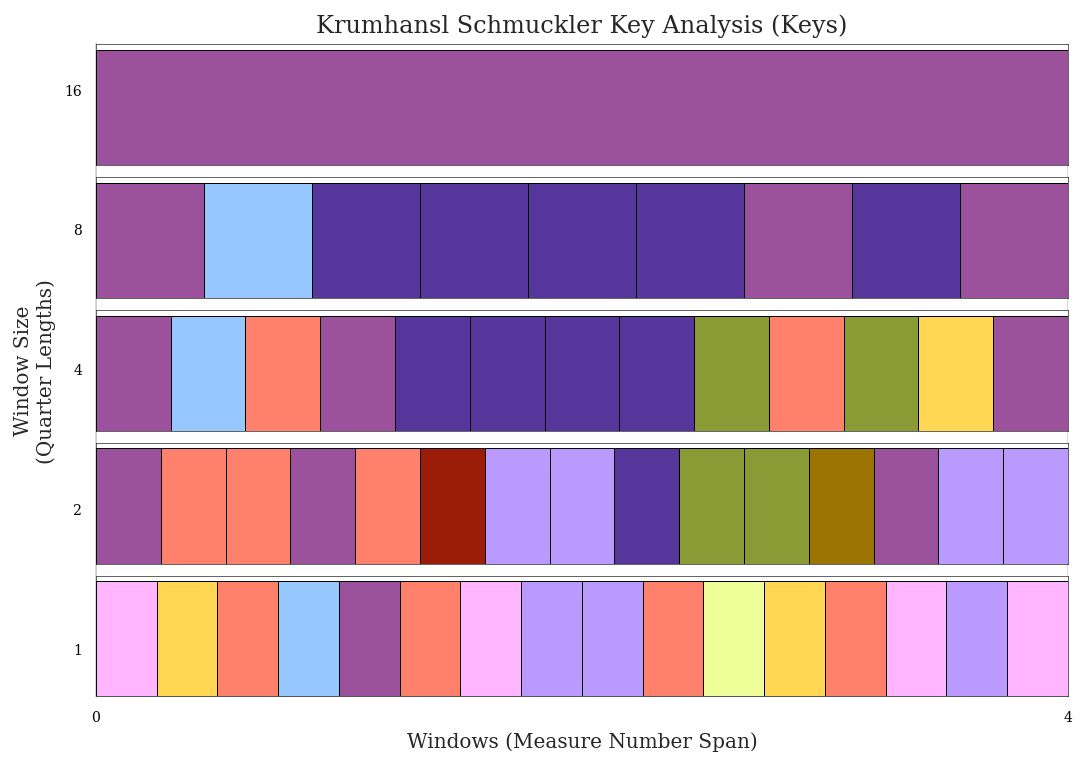

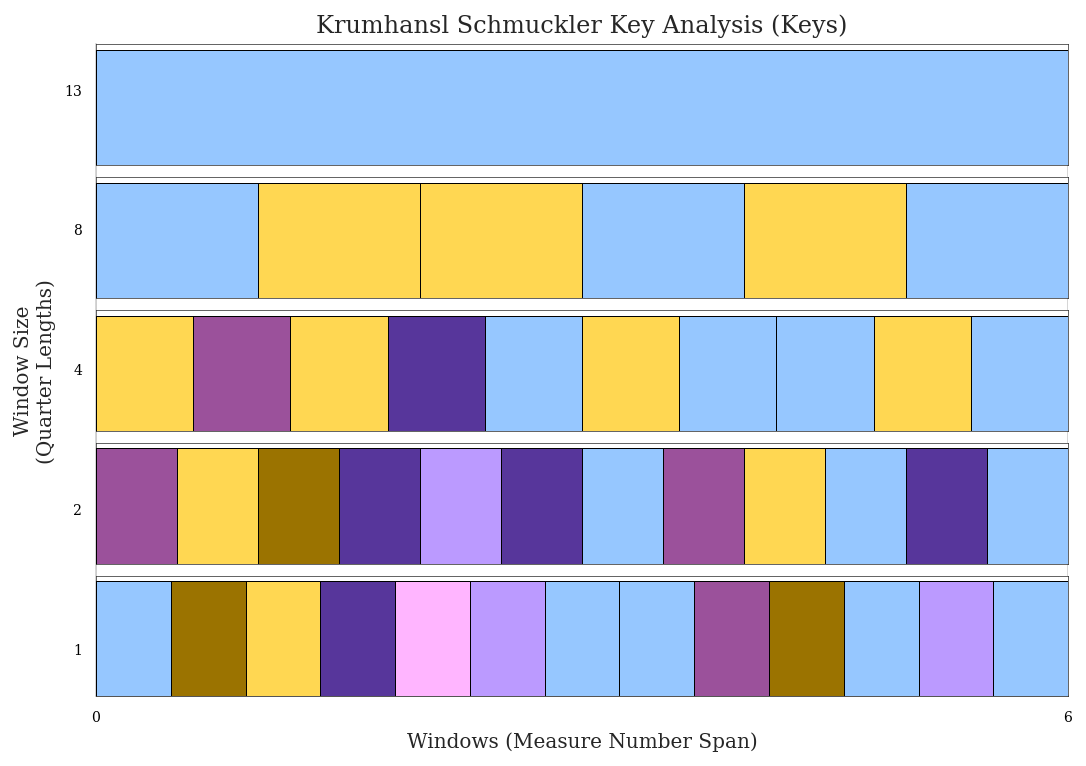

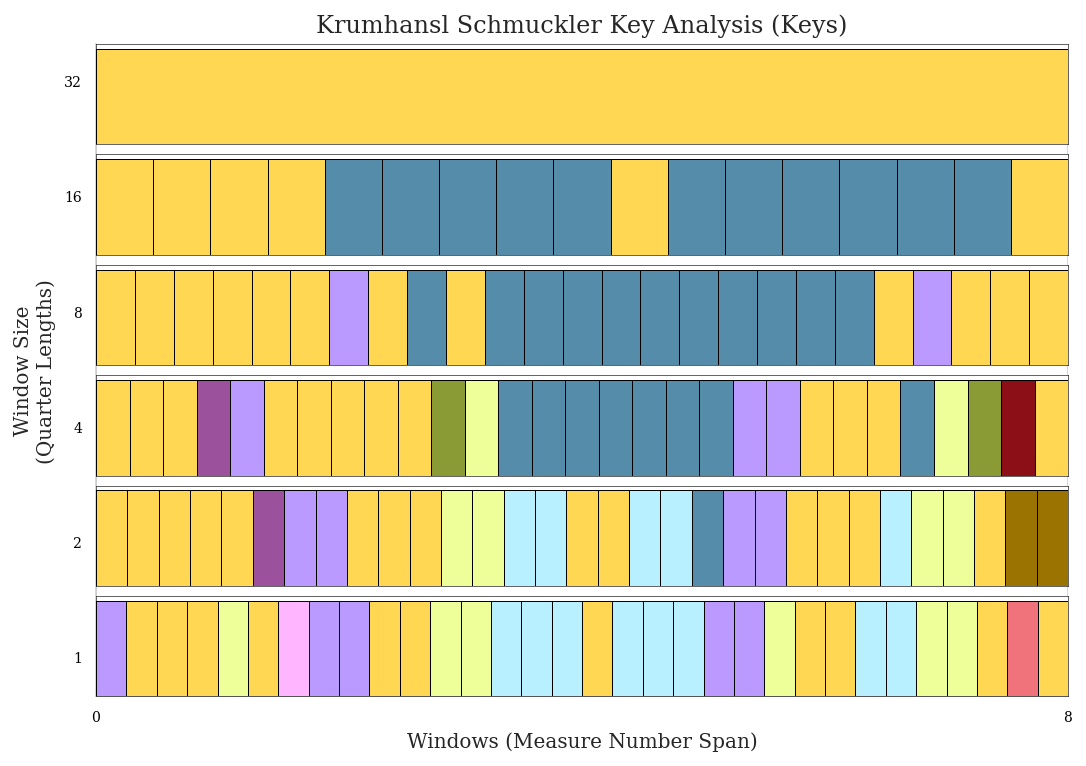

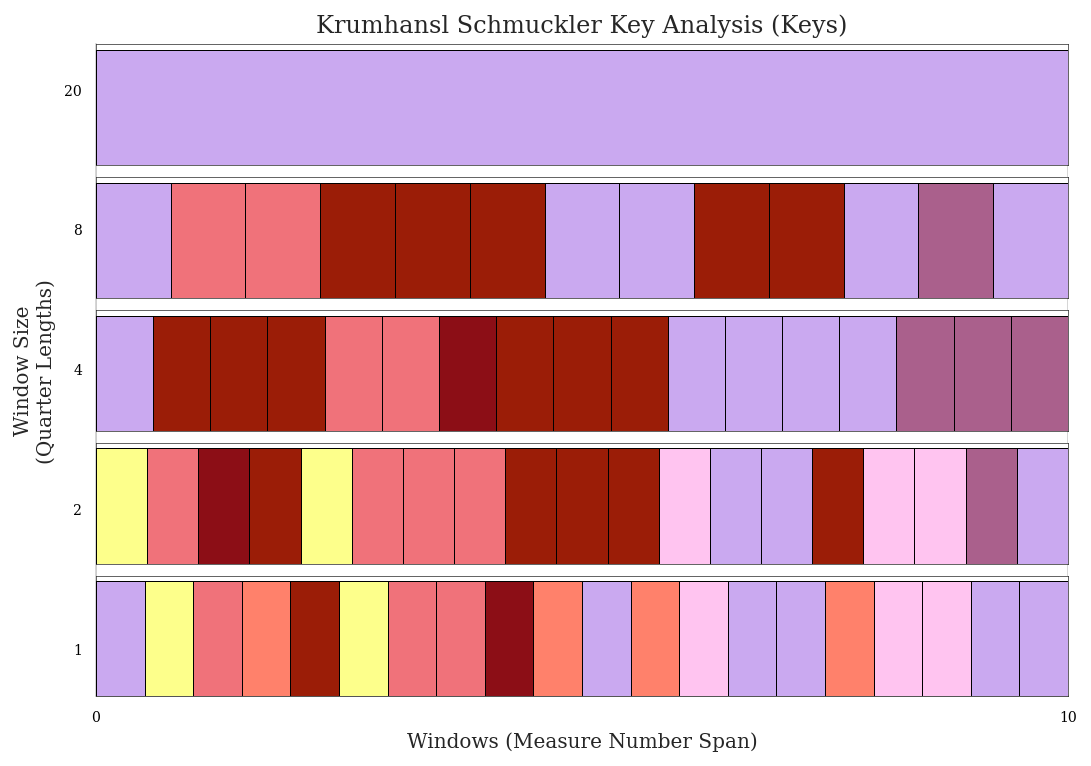

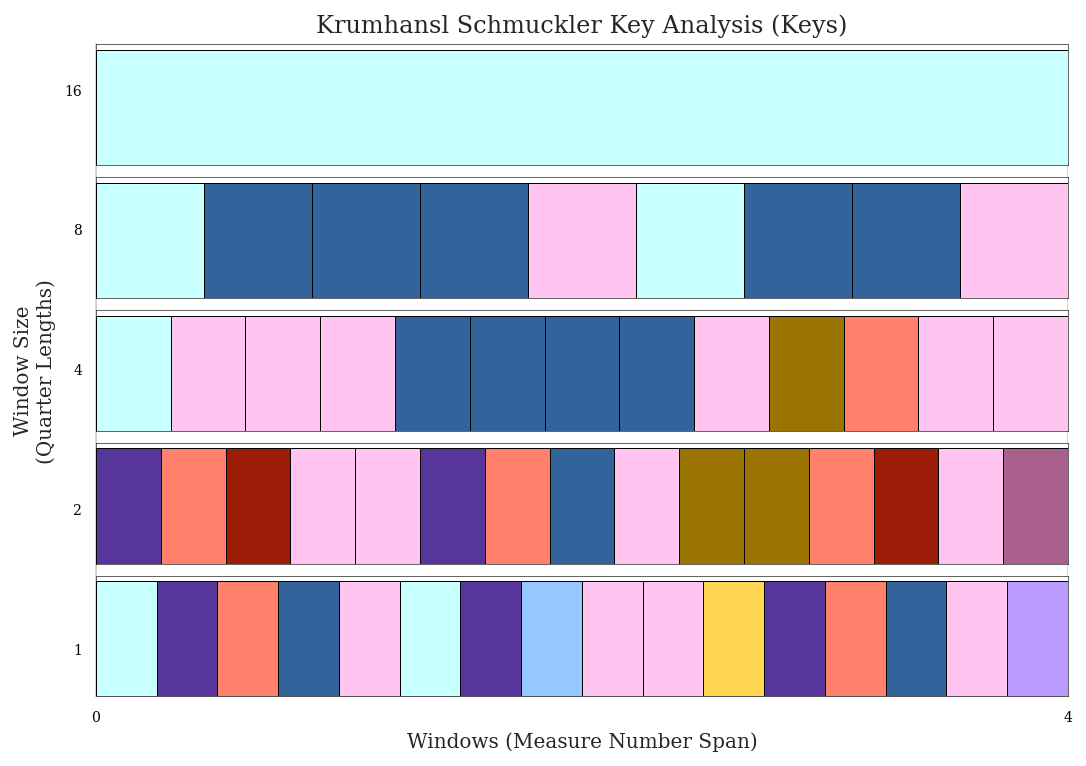

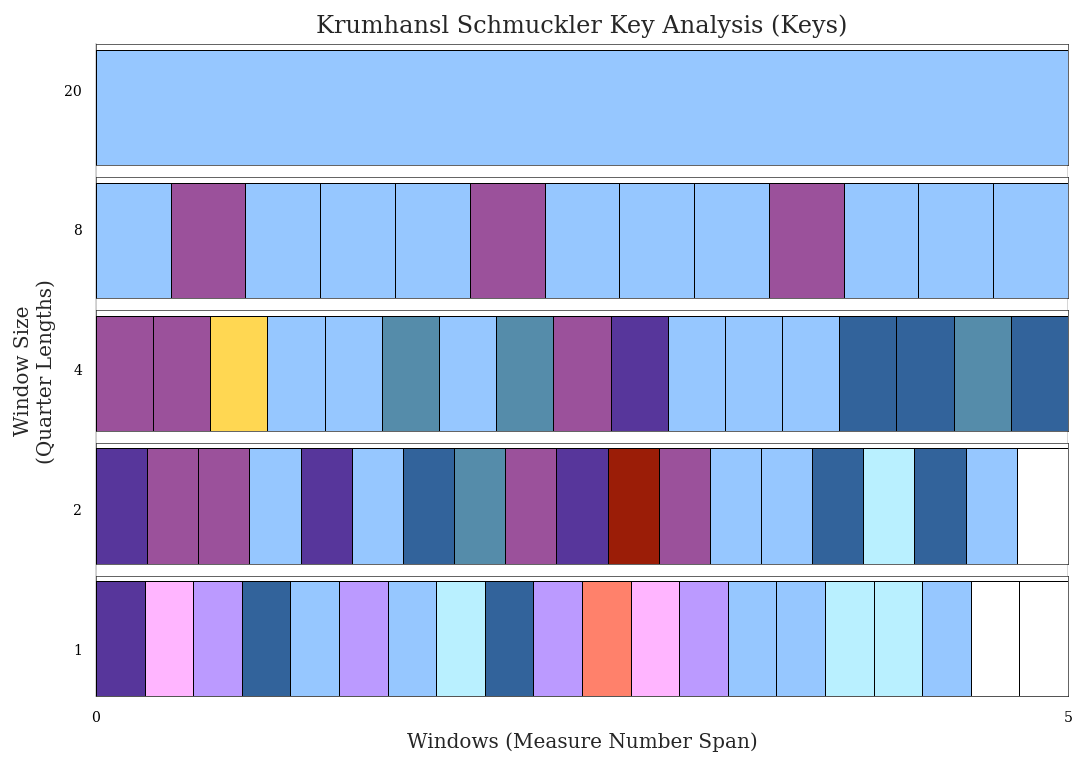

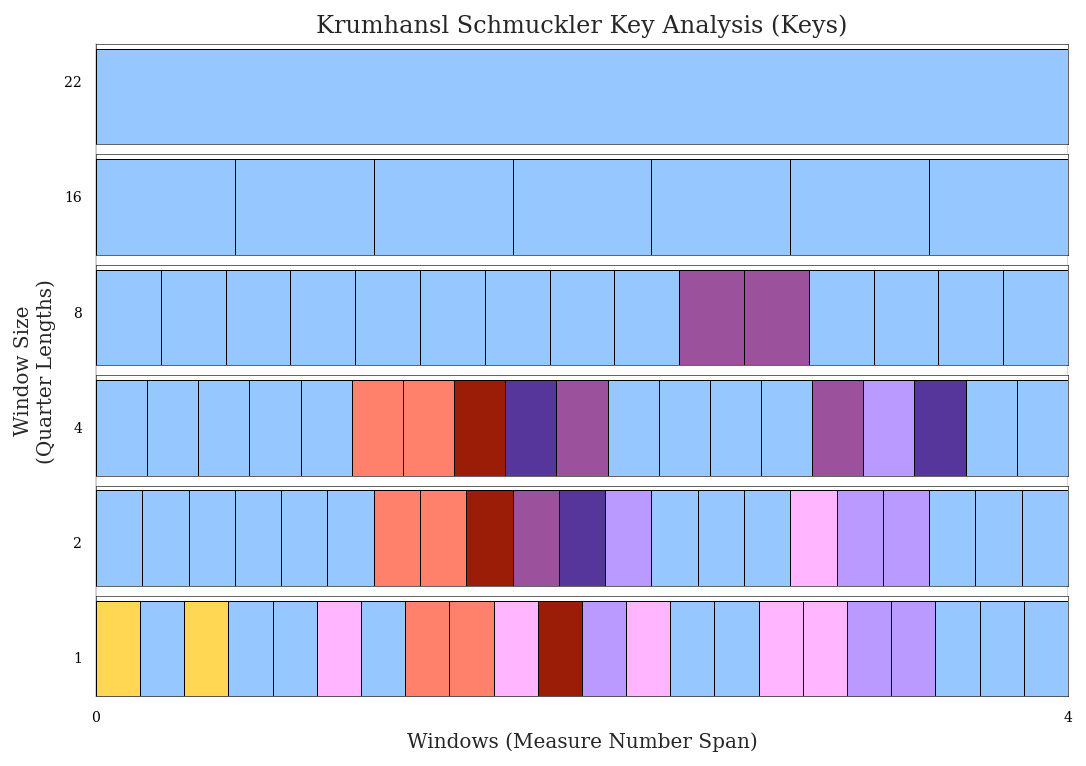

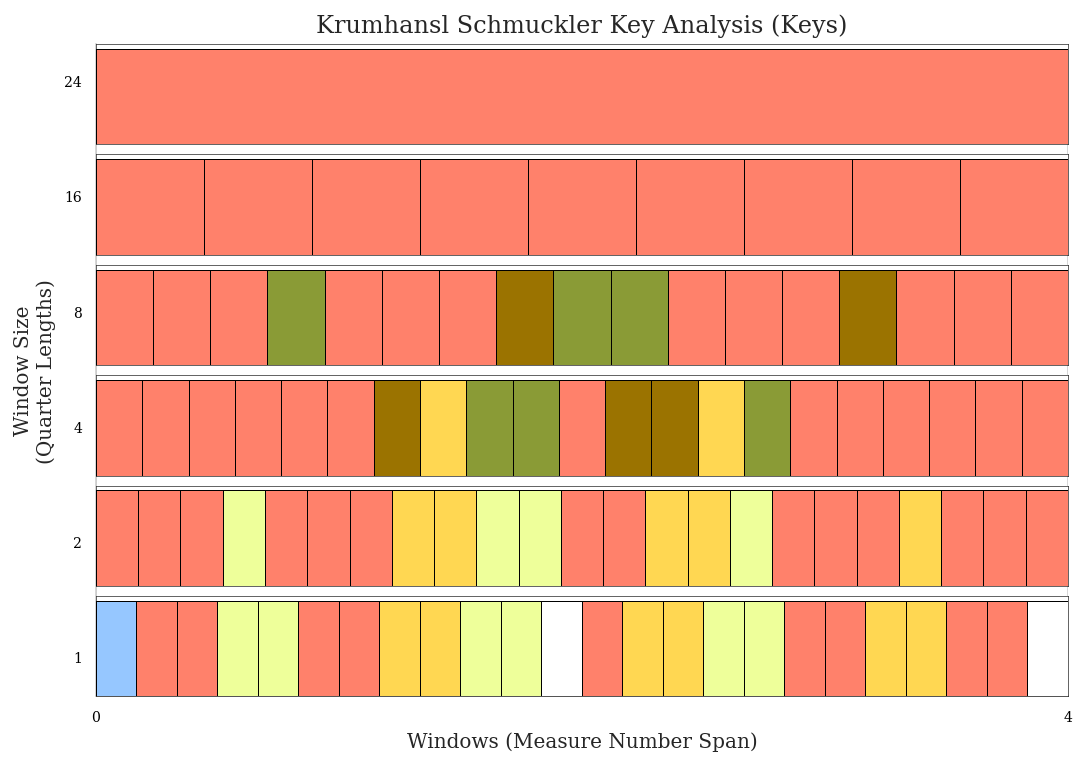

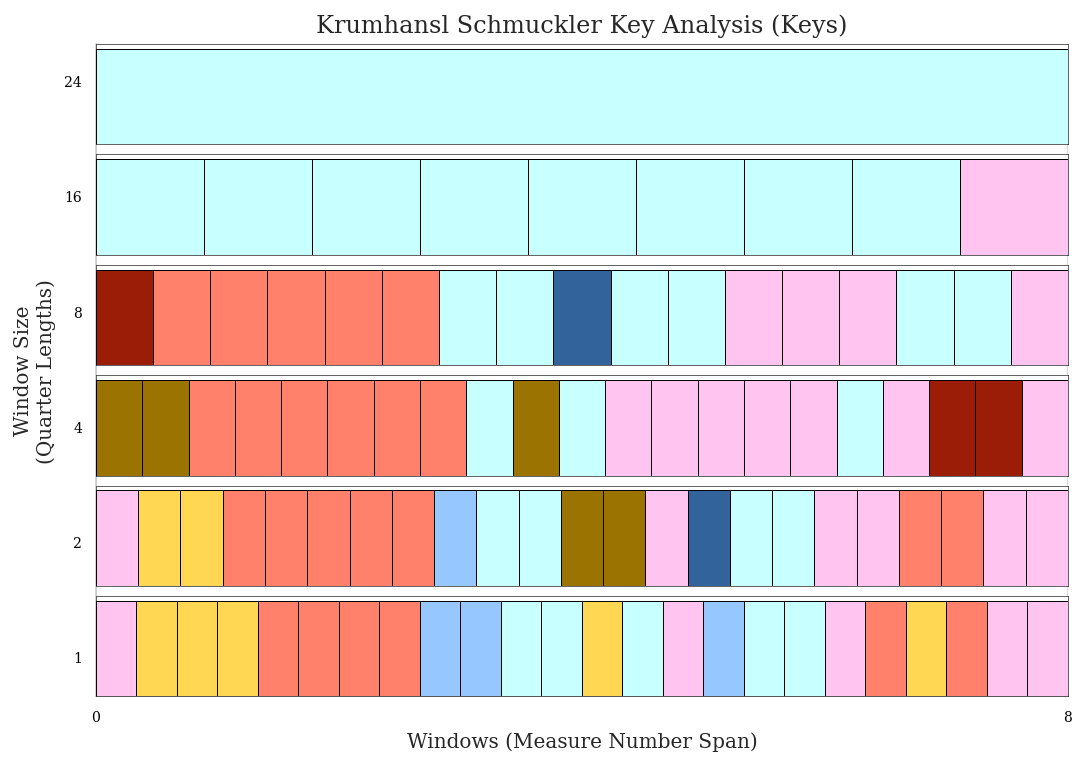

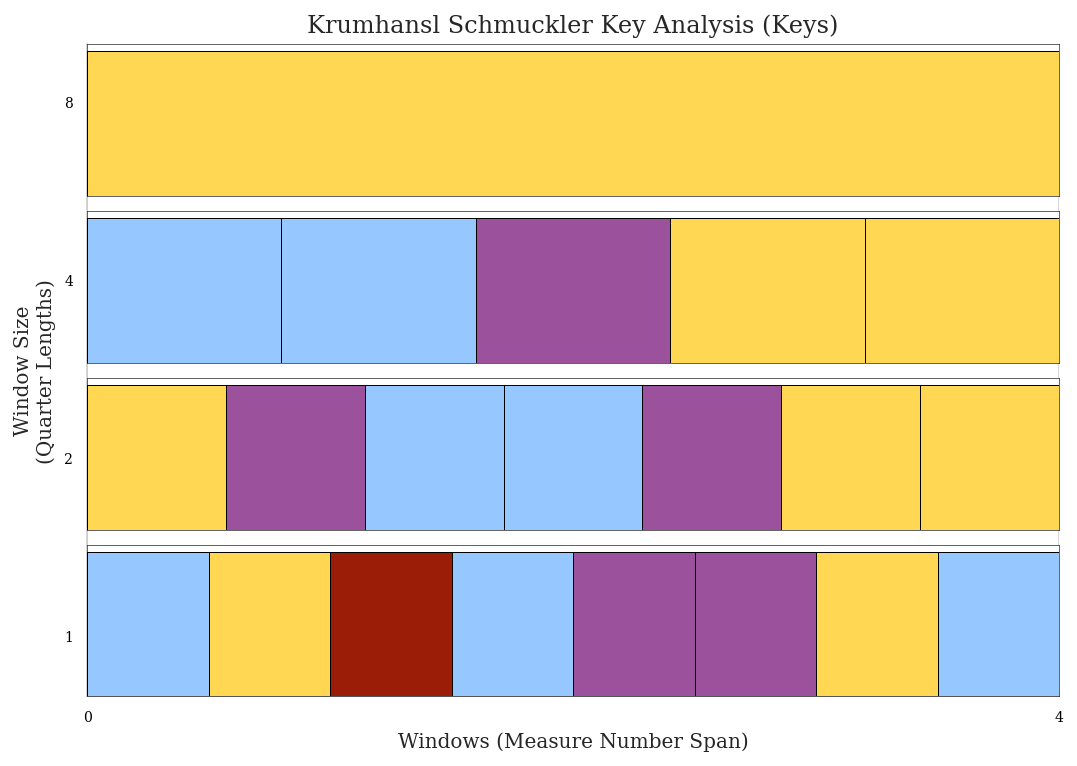

In [91]:
for kern_file in file_list:
  s = converter.parse(kern_file)
  title = kern_file.split("/")[-1]
  krum = analysis.discrete.KrumhanslKessler(s)
  krum_key = krum.getSolution(s)
  krum_key.correlationCoefficient
  p = graph.plot.WindowedKey(s.parts[0])
  print(title)
  p.run()